<a href="https://colab.research.google.com/github/mintseok/Algorithm/blob/main/3%EC%A3%BC%EC%B0%A8/graph_subway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

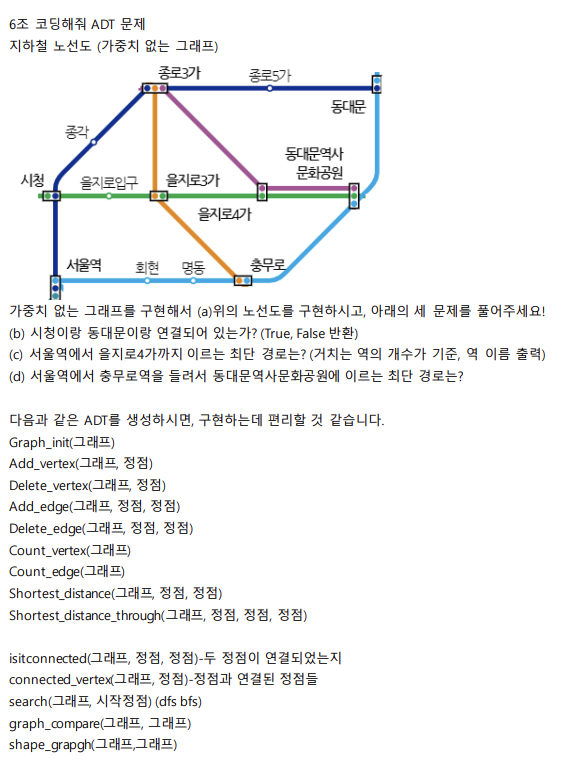

In [2]:
from collections import deque

class seoulSubway:
  def __init__(self):
    # 인접행렬 선언 및 초기화
    self.subway = []

    for _ in range(13):
        line = []
        for _ in range(13):
            line.append(0)
        self.subway.append(line)

    self.stations = {
        0: "서울역",
        1: "시청",
        2: "종각",
        3: "종로3가",
        4: "종로5가",
        5: "동대문",
        6: "회현",
        7: "명동",
        8: "충무로",
        9: "동대문역사문화공원",
        10: "을지로입구",
        11: "을지로3가",
        12: "을지로4가"
    }
    self.stationsName = dict(map(reversed, self.stations.items()))

  def connectStation(self, parent, child):
    for num in child:
      self.subway[parent][num] = 1
      self.subway[num][parent] = 1

  # 노선도 그래프 전체 출력
  def showSubway(self):
    for i in range(13):
      station = self.stations[i]
      print(station, end=': ')
      for j in range(13):
        if self.subway[i][j] == 1:
          print(f"{self.stations[j]},", end='')
      print("\n")

  def isWay(self, start, end):
    startID = self.stationsName[start]
    endID = self.stationsName[end]

    q = deque()
    visited = []
    for _ in range(13):
      visited.append(0)
    q.append(startID)
    while q:
      node = q.popleft()        
      if visited[node] != 1:
        visited[node] = 1
        for i in range(13):
          if self.subway[node][i] == 1:
            q.append(i)
      if node == endID:
        print(f"\n{start} -> {end}\n경로 존재")
        return
      
    print(f"\n{start} -> {end}\n경로를 찾을 수 없습니다")
    
  def findPath(self, route, visited, start , end): # start == 12, end == 0
    for i in route[start]:
      visited[start].append(i)

  def findBFS(self, visited, start, end):
    child = deque()
    for i in range(13):
      if self.subway[start][i] == 1:
        child.append(i)
    for i in range(len(child)):
      visited[child[i]] = start
      if child[i] == end:
        return visited
    while child:
      length = len(child)
      for _ in range(length):
        node = child.popleft()
        for i in range(13):
          if visited[i] == -1:
            if self.subway[node][i] == 1:
              if i == end:
                visited[i] = node
                return visited
            if self.subway[node][i] == 1:
              child.append(i)
              visited[i] = node

  def shortestWay(self, start, end):
    start = self.stationsName[start]
    end = self.stationsName[end]

    visited = []
    for i in range(13):
      visited.append(-1)
    visited[start] = start
    visited = self.findBFS(visited, start, end)
    #print(visited)
    next = visited[end]
    path = []
    if next == start:
      path.append(next)
    else:
      path.append(next)
      while next != start:
        next = visited[next]
        path.append(next)
    path.reverse()
    path.append(end)
    print(f'\n"{self.stations[start]}" -> "{self.stations[end]}"로의 최단경로는\n: ', end='')
    for i in range(len(path)):
      if i == len(path)-1:
        print(self.stations[path[i]])
      else:
        print(self.stations[path[i]], "-> ", end='')
      
  def shortestViaWay(self, start, via, end):
    start = self.stationsName[start]
    via = self.stationsName[via]
    end = self.stationsName[end]

    visited1 = []
    visited2 = []
    for i in range(13):
      visited1.append(-1)
      visited2.append(-1)
    visited1 = self.findBFS(visited1, start, via)
    visited2 = self.findBFS(visited2, via, end)
    next = visited1[via]
    path1 = []
    if next == start:
      path1.append(via)
    else:
      path1.append(next)
      while next != start:
        next = visited1[next]
        path1.append(next)
    path1.reverse()
    next = visited2[end]
    path2 = []
    if next == via:
      path2.append(end)
    else:
      path2.append(next)
      while next != via:
        next = visited2[next]
        path2.append(next)
    path2.append(via)
    path2.reverse()
    path = path1 + path2
    print(f'\n"{self.stations[via]}"를 거쳐 {self.stations[start]}" -> "{self.stations[end]}"로의 최단경로는\n: ', end='')
    for i in range(len(path)):
      if i == len(path)-1:
        print(self.stations[path[i]])
      else:
        print(self.stations[path[i]], "-> ", end='')


s = seoulSubway()
s.connectStation(0, [1, 6])
s.connectStation(1, [0, 2, 10])
s.connectStation(2, [1, 3])
s.connectStation(3, [2, 4, 11, 12])
s.connectStation(4, [3, 5])
s.connectStation(5, [4, 9])
s.connectStation(6, [0, 7])
s.connectStation(7, [6, 8])
s.connectStation(8, [7, 9, 11])
s.connectStation(9, [5, 8, 12])
s.connectStation(10, [1, 11])
s.connectStation(11, [3, 8, 10, 12])
s.connectStation(12, [3, 9, 11])

s.showSubway()
s.isWay('종로5가', '동대문')
s.shortestWay('서울역', '을지로4가')
#s.shortestWay('충무로', '동대문역사문화공원')
s.shortestViaWay('서울역', '충무로', '동대문역사문화공원')

서울역: 시청,회현,

시청: 서울역,종각,을지로입구,

종각: 시청,종로3가,

종로3가: 종각,종로5가,을지로3가,을지로4가,

종로5가: 종로3가,동대문,

동대문: 종로5가,동대문역사문화공원,

회현: 서울역,명동,

명동: 회현,충무로,

충무로: 명동,동대문역사문화공원,을지로3가,

동대문역사문화공원: 동대문,충무로,을지로4가,

을지로입구: 시청,을지로3가,

을지로3가: 종로3가,충무로,을지로입구,을지로4가,

을지로4가: 종로3가,동대문역사문화공원,을지로3가,


종로5가 -> 동대문
경로 존재

"서울역" -> "을지로4가"로의 최단경로는
: 서울역 -> 시청 -> 종각 -> 종로3가 -> 을지로4가

"충무로"를 거쳐 서울역" -> "동대문역사문화공원"로의 최단경로는
: 서울역 -> 회현 -> 명동 -> 충무로 -> 동대문역사문화공원
